# DATASET PREPROCESSING

In [1]:
import pandas as pd
import numpy as np
# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
from sklearn import preprocessing
import csv

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
data = pd.read_csv('BCW_dataset.csv')
data

,Unnamed: 0,x.radius_mean,x.texture_mean,x.perimeter_mean,x.area_mean,x.smoothness_mean,x.compactness_mean,x.concavity_mean,x.concave_pts_mean,x.symmetry_mean,...,x.texture_worst,x.perimeter_worst,x.area_worst,x.smoothness_worst,x.compactness_worst,x.concavity_worst,x.concave_pts_worst,x.symmetry_worst,x.fractal_dim_worst,y
0,1,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,0.1885,...,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259,B
1,2,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,0.1967,...,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183,B
2,3,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,0.1815,...,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773,B
3,4,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,0.1467,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,B
4,5,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,0.1769,...,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,565,20.920,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.147400,0.2149,...,29.41,179.10,1819.0,0.14070,0.41860,0.65990,0.25420,0.2929,0.09873,M
565,566,21.560,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.138900,0.1726,...,26.40,166.10,2027.0,0.14100,0.21130,0.41070,0.22160,0.2060,0.07115,M
566,567,20.130,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.097910,0.1752,...,38.25,155.00,1731.0,0.11660,0.19220,0.32150,0.16280,0.2572,0.06637,M
567,568,16.600,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.053020,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.34030,0.14180,0.2218,0.07820,M


### DATASET STRUCTURE
- The dataset consists of 10 tumor-shape related features: their mean, standart error and the worst value.
- No null-data, no duplicates.
- Column 'y' contains diagnosis in the str format, other features are float.

In [3]:
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           569 non-null    int64  
 1   x.radius_mean        569 non-null    float64
 2   x.texture_mean       569 non-null    float64
 3   x.perimeter_mean     569 non-null    float64
 4   x.area_mean          569 non-null    float64
 5   x.smoothness_mean    569 non-null    float64
 6   x.compactness_mean   569 non-null    float64
 7   x.concavity_mean     569 non-null    float64
 8   x.concave_pts_mean   569 non-null    float64
 9   x.symmetry_mean      569 non-null    float64
 10  x.fractal_dim_mean   569 non-null    float64
 11  x.radius_se          569 non-null    float64
 12  x.texture_se         569 non-null    float64
 13  x.perimeter_se       569 non-null    float64
 14  x.area_se            569 non-null    float64
 15  x.smoothness_se      569 non-null    flo

### DATASET PREPROCESSING 1: extra features removal
- X dataset: all columns 'x.feature_mean' and 'y'= diagnosis)
- replacement of diagnosis 'B' and 'M' with 0 and 1.

In [4]:
X = pd.concat([data.iloc[:, 1:11], data.iloc[:, 21:32]], axis=1)     # y = 0, 1
X.loc[(X.y == 'B'), 'y'] = 0
X.loc[(X.y == 'M'), 'y'] = 1

### GROUPS '0' and '1' COMPARISONS
- histograms and box plots show different distributions and different group means for '0' and '1'
- the best features to distinguish '0' and '1' are: x_radius.mean -- x.concavity_mean, x_symmetry.worst, x.fractal_dim.worst 

In [5]:
def histogram_function(data, nrows, ncols, h, w):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(h,w))
    axes = axes.flatten()[:len(data.columns)]                                   
    
    for i, (col, ax) in enumerate(zip(data.columns, axes)):
        sns.histplot(data=data, x=col, hue='y', stat="probability", common_norm=True, kde=True, ax=ax)
        ax.set_title(col)
    plt.show()

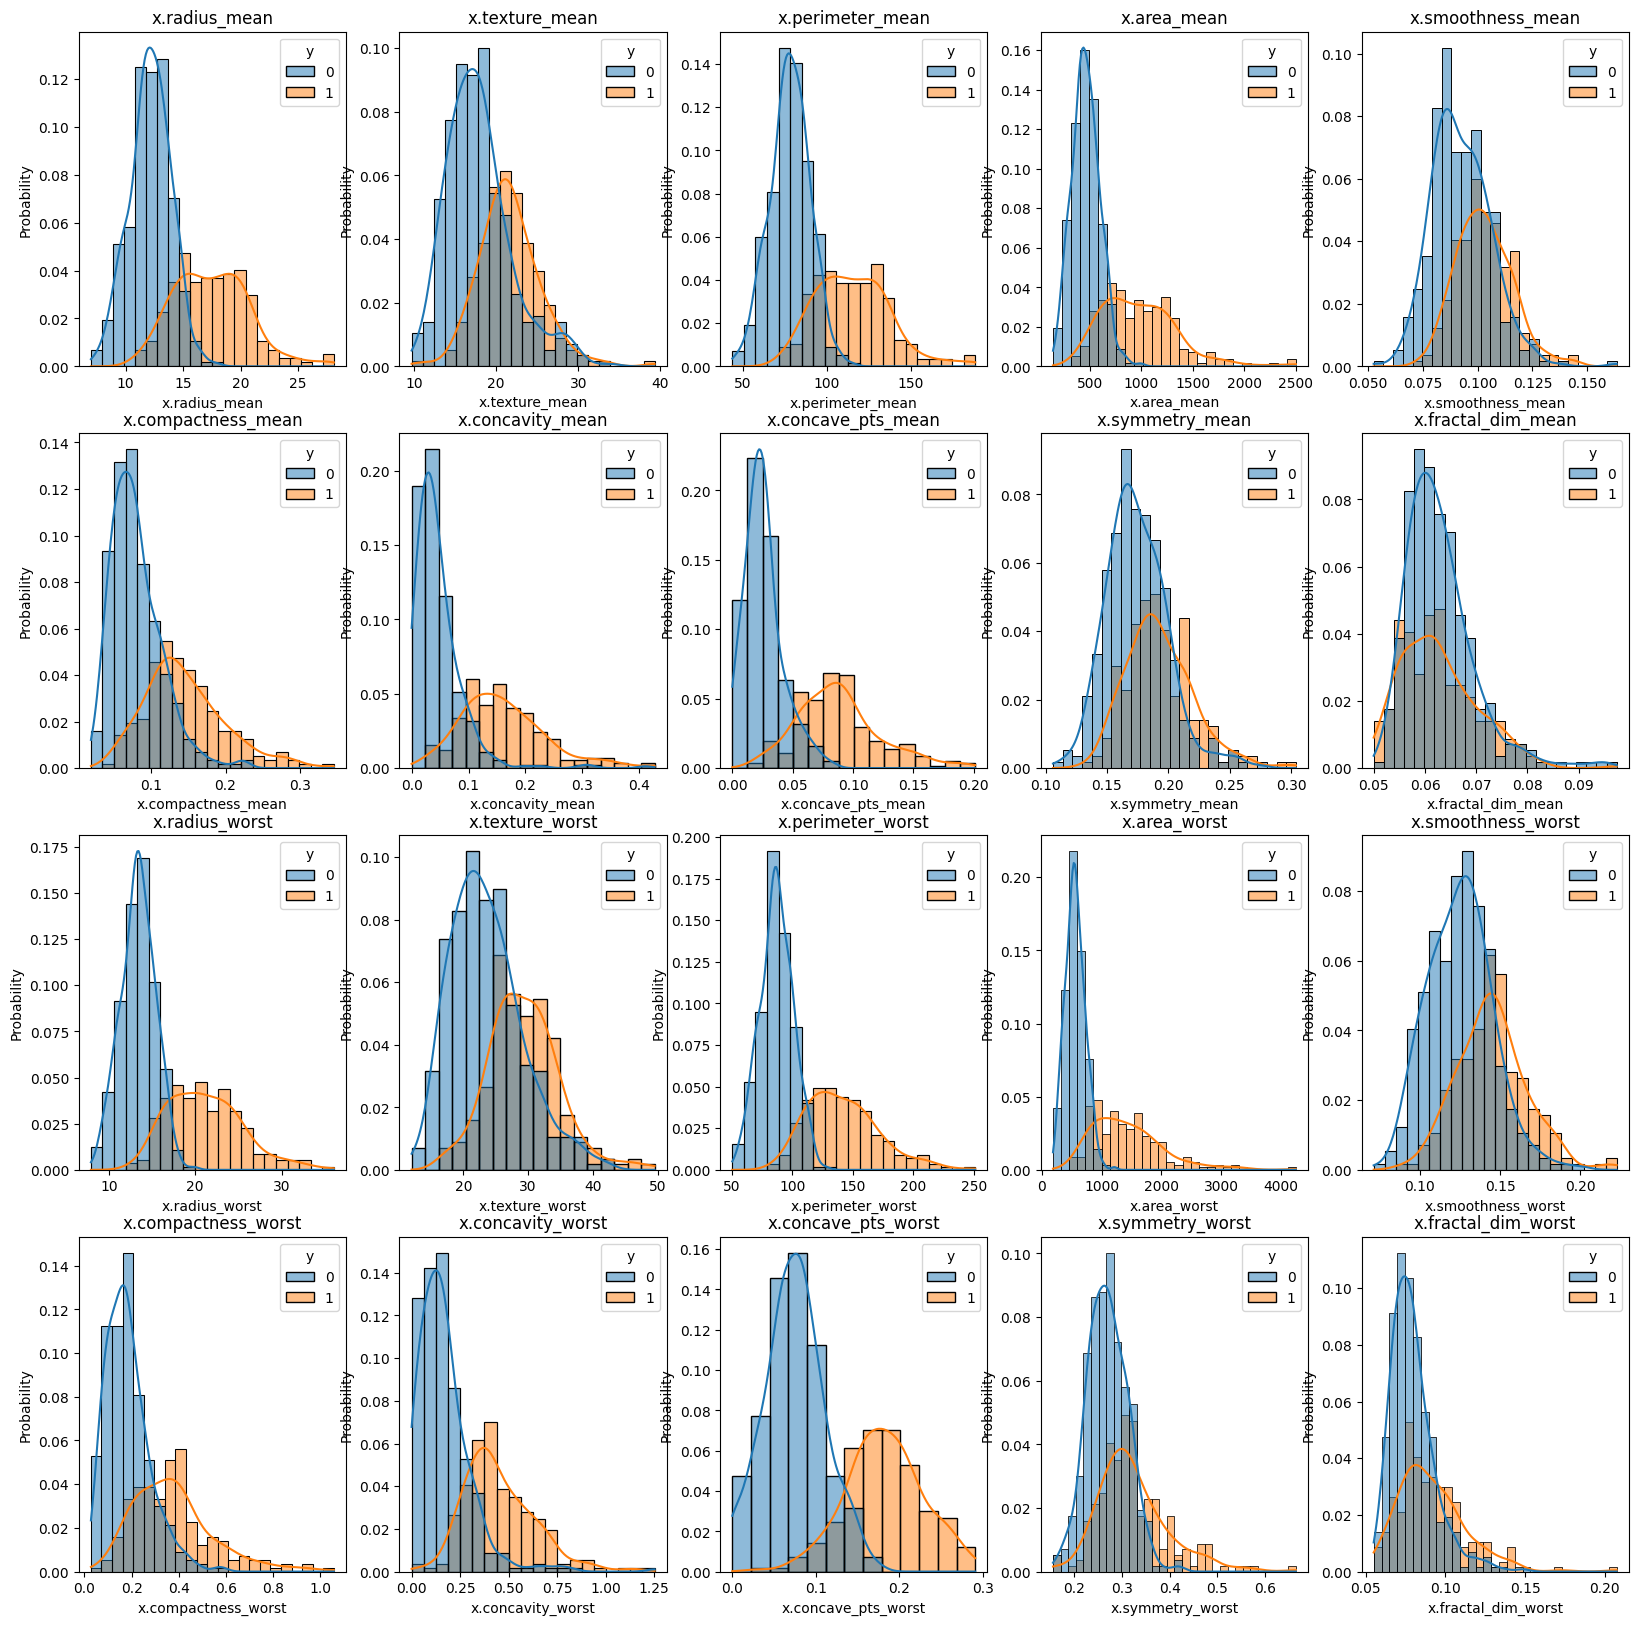

In [6]:
histogram_function(X, 4, 5, 20, 20)

In [7]:
def barplot_function(feature):
    g = sns.catplot(data=X, x=feature, y="y", kind="box", orient="h", sharex=False, margin_titles=True, height=1.0, aspect=4)
    g.set(xlabel=feature, ylabel="")
    g.set_titles(row_template="{row_name} diagnosis")

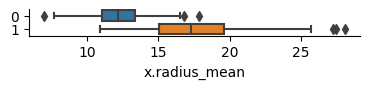

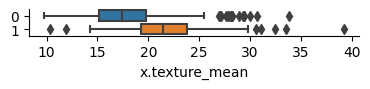

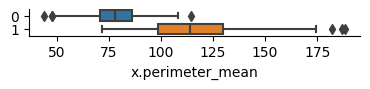

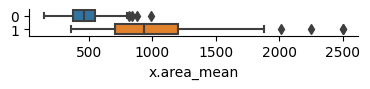

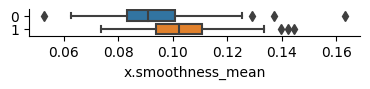

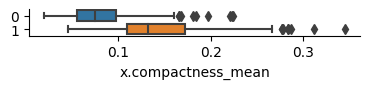

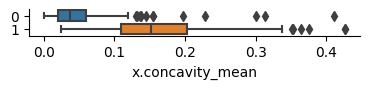

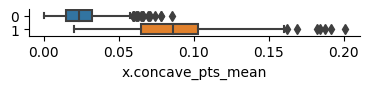

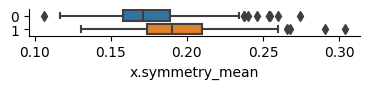

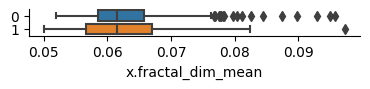

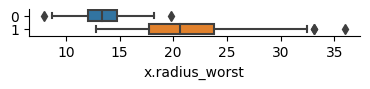

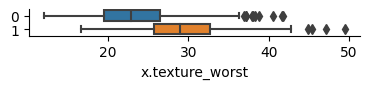

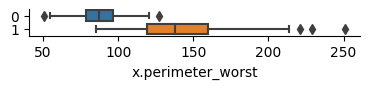

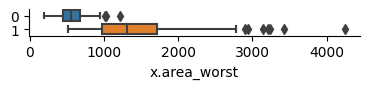

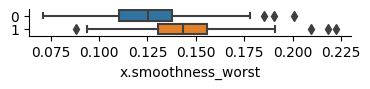

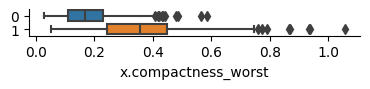

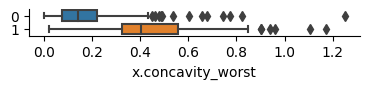

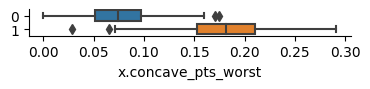

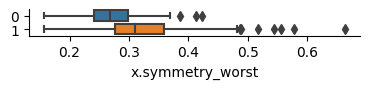

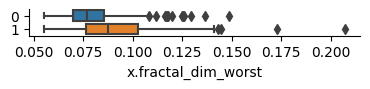

In [8]:
for x in X.columns[0:20]:
    barplot_function(x)

### DATASET PREPROCESSING 2: the best features

In [9]:
X = pd.concat([X.iloc[:, 0:8], X.iloc[:, 18:22]], axis=1) 
print('dataset columns:', X.columns)

dataset columns: Index(['x.radius_mean', 'x.texture_mean', 'x.perimeter_mean', 'x.area_mean',
       'x.smoothness_mean', 'x.compactness_mean', 'x.concavity_mean',
       'x.concave_pts_mean', 'x.symmetry_worst', 'x.fractal_dim_worst', 'y'],
      dtype='object')


### CORRELATIONS
- features 'x.radius_mean', 'x.perimeter_mean', 'x.area_mean' have a strong mutual correlation (r>0.98)
- x.radius_mean can represent other two features

In [10]:
def correlation_function(X_):
    corr = X_.corr()
    fig = px.imshow(corr, width=1600, height=1000, text_auto=True)
    fig.update_layout(font=dict(size=24, color="RebeccaPurple"))    
    fig.show(renderer="png")

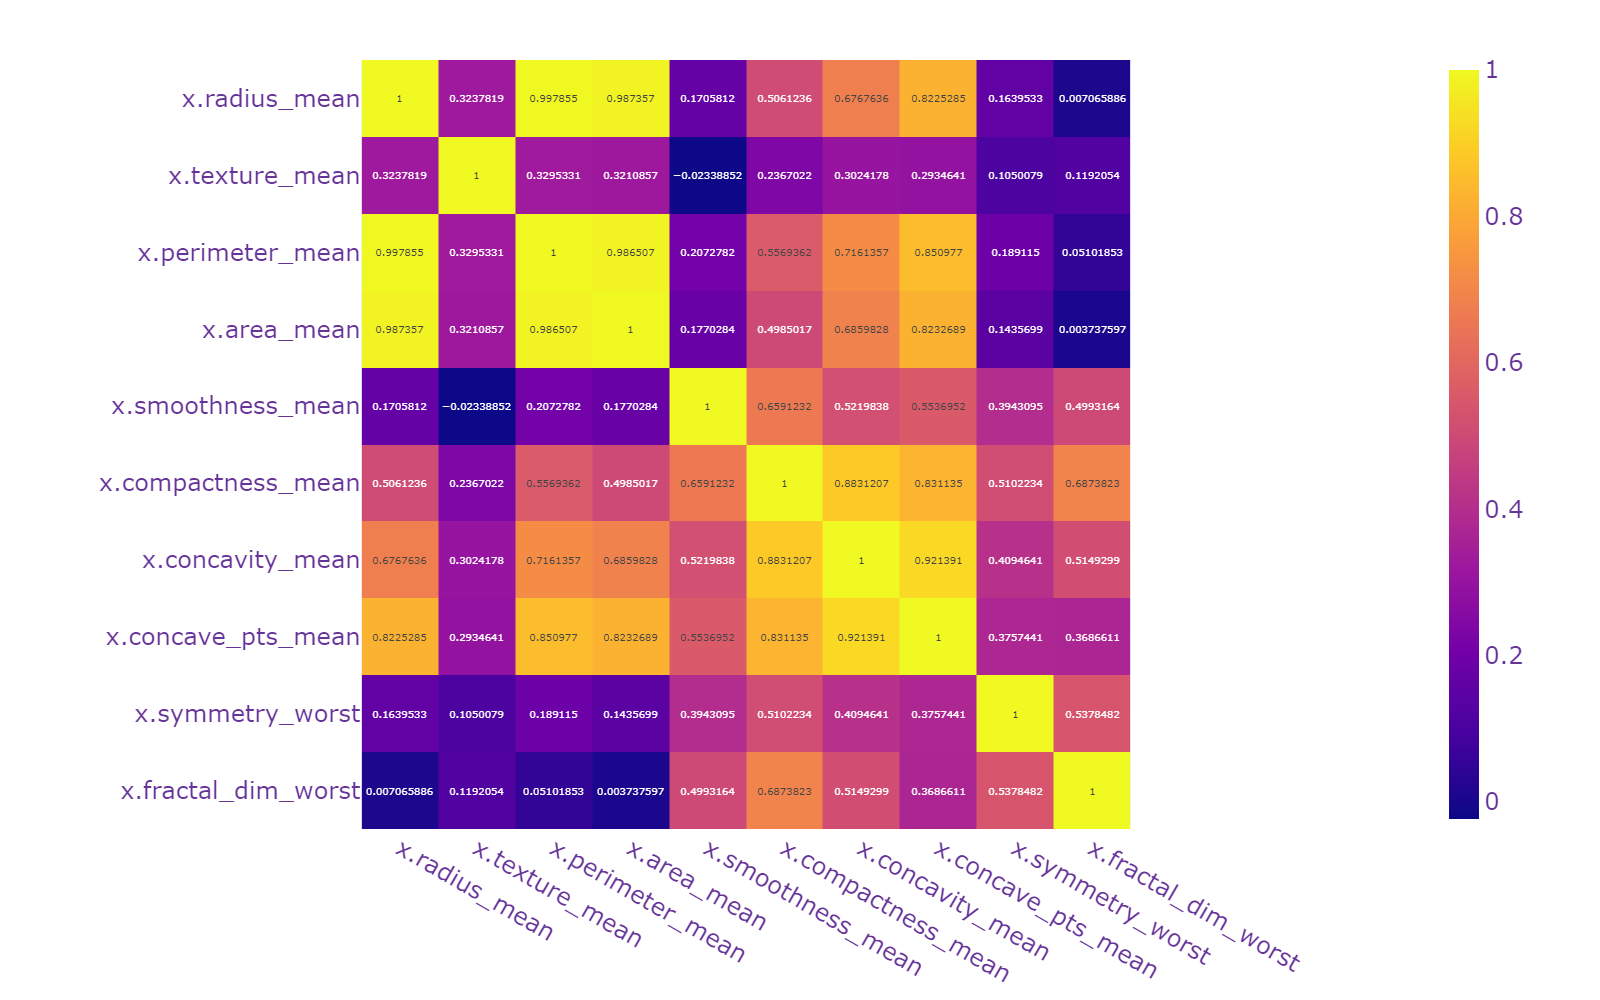

In [11]:
X_cor = X.iloc[:, 0:11]
correlation_function(X_cor)

### DATA PREPROCESSING 3: removal of highly correlated features
- remove 'x.perimeter_mean', 'x.area_mean'

In [12]:
X = X.drop(['x.perimeter_mean', 'x.area_mean'], axis=1)
print('dataset columns:', X.columns)
X.describe().T 

dataset columns: Index(['x.radius_mean', 'x.texture_mean', 'x.smoothness_mean',
       'x.compactness_mean', 'x.concavity_mean', 'x.concave_pts_mean',
       'x.symmetry_worst', 'x.fractal_dim_worst', 'y'],
      dtype='object')


,count,mean,std,min,25%,50%,75%,max
x.radius_mean,569.0,14.127292,3.524049,6.98100,11.70000,13.37000,15.78000,28.1100
x.texture_mean,569.0,19.289649,4.301036,9.71000,16.17000,18.84000,21.80000,39.2800
x.smoothness_mean,569.0,0.096360,0.014064,0.05263,0.08637,0.09587,0.10530,0.1634
x.compactness_mean,569.0,0.104341,0.052813,0.01938,0.06492,0.09263,0.13040,0.3454
x.concavity_mean,569.0,0.088799,0.079720,0.00000,0.02956,0.06154,0.13070,0.4268
x.concave_pts_mean,569.0,0.048919,0.038803,0.00000,0.02031,0.03350,0.07400,0.2012
x.symmetry_worst,569.0,0.290076,0.061867,0.15650,0.25040,0.28220,0.31790,0.6638
x.fractal_dim_worst,569.0,0.083946,0.018061,0.05504,0.07146,0.08004,0.09208,0.2075


### DATA PREPROCESSING 4: data normalization
- method 'MAX'

In [13]:
d_norm, max_norm = preprocessing.normalize(X, norm='max', axis=0, copy=True, return_norm=True)   
X_norm = pd.DataFrame(d_norm)  
X_norm.columns = list(X.columns)

mx = pd.DataFrame(max_norm.reshape(1,-1))
mx.to_csv('max_norm.csv')

### CSV FILE WITH PREPROCESSED DATA

In [14]:
def save_file_function(content, file_name, file_format='csv'):  
    import os    
    n = 1
    while True:  
        name = file_name+'('+str(n)+').'+file_format
        if os.path.isfile(name) == True:
            n += 1 
        else:
            try:
                content.to_csv(name)   
                print('object saved:', os.getcwd()+'\\'+name)
                break
            except Exception:
                print('sorry, object not saved')
                break

In [15]:
save_file_function(X_norm, 'preprocessed_data', file_format='csv')

object saved: C:\Users\MyWork\PycharmProjects\pythonProject3\preprocessed_data(1).csv
